Here, we look at how restaurant profit varies with city population and build a linear regression model.

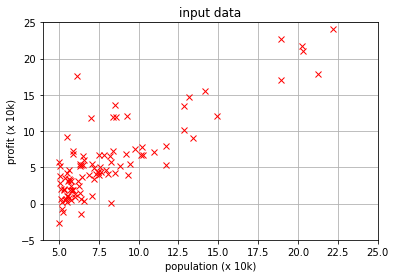

In [2]:
import numpy as np
from matplotlib import pyplot

def read_input_file(file_name):
    ip_array = np.loadtxt(file_name, delimiter=',')
    return ip_array # ip_array is a numpy array

def prepare_input_matrices(ip_array):
    (ip_row_count, ip_col_count) = ip_array.shape
    ip_x_array = ip_array[:,0:ip_col_count-1]
    ip_y_array = ip_array[:,ip_col_count-1:ip_col_count]

    return ip_x_array, ip_y_array

def plot_1d_scatterplot(x_array,y_array,title,xlabel,ylabel,lim_list,marker_str,linewidth_num):
    # there should be some error handling to check if the dimensions of x and y match, let's do that later
    pyplot.plot(x_array,y_array,marker_str,linewidth = linewidth_num)
    pyplot.title(title)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.axis(lim_list)
    pyplot.grid(True)
    pyplot.show()

# read the input file
ip_array = read_input_file("ex1data1.txt")

# separate input file into training set input and output
(ip_x_array, ip_y_array) = prepare_input_matrices(ip_array)
(training_set_sample_count,training_set_feature_count) = ip_x_array.shape

# plot the input data as a scatter plot
plot_1d_scatterplot(ip_x_array[:, 0],ip_y_array[:, 0],"input data","population (x 10k)","profit (x 10k)",[4, 25, -5, 25],"rx",2)

theta after gradient descent: 
 [[ 5.83913505]
 [20.49078062]]
cost:  4.476971395629828
iter count:  20000


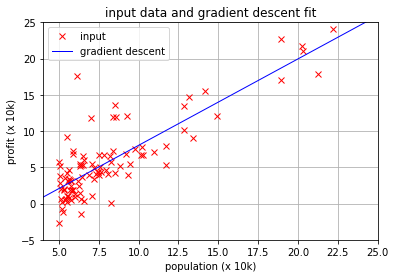

In [4]:
def perform_feature_normalization(ip_x_array):
    (ip_row_count, ip_col_count) = ip_x_array.shape
    norm_x_array = np.zeros(ip_x_array.shape)
    mean_x_array = np.zeros((1,ip_col_count))
    range_x_array = np.zeros((1, ip_col_count))

    for i in range(0,ip_col_count):
        curr_x_feature = ip_x_array[:,i]
        mean_x_array[0,i] = curr_x_feature.mean()
        range_x_array[0, i] = curr_x_feature.max() - curr_x_feature.min()
        norm_x_array[:,i] = (curr_x_feature - mean_x_array[0,i])/(range_x_array[0, i])

    return norm_x_array,mean_x_array,range_x_array

def create_design_array(ip_x_array):
    (ip_row_count, ip_col_count) = ip_x_array.shape
    design_array = np.ones((ip_row_count, ip_col_count+1))
    design_array[:,1::] = ip_x_array

    return design_array

def compute_model_output_array(ip_design_array, ip_parameter_array):
    ip_design_matrix = np.asmatrix(ip_design_array)
    ip_parameter_matrix = np.asmatrix(ip_parameter_array)
    model_output_matrix = ip_design_matrix*ip_parameter_matrix

    return np.asarray(model_output_matrix)


def compute_cost_function_square_mean_error(ip_design_array, ip_parameter_array, ip_y_array):
    (sample_size_count, feature_count) = ip_design_array.shape
    model_output_array = compute_model_output_array(ip_design_array, ip_parameter_array)
    error_array = model_output_array - ip_y_array
    error_matrix = np.asmatrix(error_array)

    cost_function = (error_matrix.transpose()*error_matrix)/(2*sample_size_count)
    return cost_function

def perform_gradient_descent(ip_design_array, ip_parameter_array, ip_y_array, learning_rate, init_cost, max_iter):
    (sample_size_count, feature_count) = ip_design_array.shape

    # initialize the array which holds the cost after each iteration and the number of iterations performed
    cost_array = np.zeros(max_iter)
    iter_count = 0

    # define the minimum acceptable cost
    acceptable_cost = (0.1/100)*init_cost
    curr_cost = init_cost

    while (curr_cost >= acceptable_cost) and (iter_count < max_iter):
        model_output_array = compute_model_output_array(ip_design_array, ip_parameter_array)
        error_array = model_output_array - ip_y_array

        error_matrix = np.asmatrix(error_array)
        ip_design_matrix = np.asmatrix(ip_design_array)

        ip_parameter_array = ip_parameter_array - (ip_design_matrix.transpose()*error_matrix)*(learning_rate/sample_size_count)
        curr_cost = compute_cost_function_square_mean_error(ip_design_array, ip_parameter_array, ip_y_array)
        cost_array[iter_count] = curr_cost
        iter_count += 1

    return ip_parameter_array, cost_array, iter_count

def plot_1d_scatter_and_fit(x_array_scatter,y_array_scatter,x_array_fit,y_array_fit,title,xlabel,ylabel,lim_list,
                            marker_str_scatter,linewidth_num_scatter,marker_str_fit,linewidth_num_fit,legend_scatter,
                            legend_fit):
    # there should be some error handling to check if the dimensions of x and y match, let's do that later
    pyplot.plot(x_array_scatter,y_array_scatter,marker_str_scatter,linewidth = linewidth_num_scatter,label=legend_scatter)
    pyplot.plot(x_array_fit, y_array_fit, marker_str_fit, linewidth=linewidth_num_fit,label=legend_fit)
    pyplot.title(title)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.axis(lim_list)
    pyplot.grid(True)
    pyplot.legend()
    pyplot.show()


# perform feature normalization
(norm_x_array, mean_x_array, range_x_array) = perform_feature_normalization(ip_x_array)

# create the design array (X) and the model parameter array (theta)
ip_design_array = create_design_array(norm_x_array)
model_parameter_array = np.zeros((training_set_feature_count+1,1))

# compute the model output and cost with initial guess for theta
init_model_output_array = compute_model_output_array(ip_design_array, model_parameter_array)
init_cost = compute_cost_function_square_mean_error(ip_design_array, model_parameter_array, ip_y_array)
# print("initial theta: \n", model_parameter_array)
# print("initial cost: ", init_cost)

# compute the model parameters using gradient descent
learning_rate = 0.01
max_iter = 20000
(model_parameter_array_gradient_descent,gradient_descent_cost_array,iter_count) = perform_gradient_descent(ip_design_array,model_parameter_array,ip_y_array,learning_rate,init_cost,max_iter)

print("theta after gradient descent: \n", model_parameter_array_gradient_descent)
print("cost: ", gradient_descent_cost_array[iter_count-1])
print("iter count: ", iter_count)

# plot scatter plot along with gradient descent fit
x_vals = np.arange(0,25,0.1)
(x_vals_count,) = x_vals.shape
x_vals_array = np.ones((x_vals_count,2))
x_vals_array[:,1] = x_vals

x_vals_norm = (x_vals - mean_x_array[0,0])/range_x_array[0,0]
x_vals_norm_array = np.ones((x_vals_count, 2))
x_vals_norm_array[:, 1] = x_vals_norm

y_vals_array = compute_model_output_array(x_vals_norm_array, model_parameter_array_gradient_descent)

plot_1d_scatter_and_fit(ip_x_array[:, 0],ip_y_array[:, 0],x_vals_array[:,1], y_vals_array[:,0],
                        "input data and gradient descent fit","population (x 10k)","profit (x 10k)",[4, 25, -5, 25],
                        "rx",2,"b-",1,"input","gradient descent")

theta after normal equation: 
 [[-3.89578088]
 [ 1.19303364]]
cost:  [[4.47697138]]


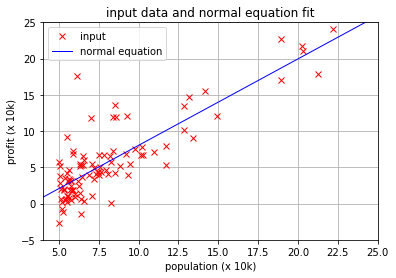

In [5]:
def perform_normal_equation(ip_design_array, ip_y_array):
    ip_design_matrix = np.asmatrix(ip_design_array)
    ip_y_matrix = np.asmatrix(ip_y_array)

    parameter_array = (np.linalg.pinv(ip_design_matrix.transpose()*ip_design_matrix))*ip_design_matrix.transpose()*ip_y_matrix
    normal_equation_cost = compute_cost_function_square_mean_error(ip_design_array, parameter_array, ip_y_array)

    return parameter_array,normal_equation_cost

# compute the model parameters using the normal equation
# the normal equation does not require feature normalization
ip_design_array = create_design_array(ip_x_array)
(model_parameter_array_normal_equation,normal_equation_cost) = perform_normal_equation(ip_design_array,ip_y_array)

print("theta after normal equation: \n", model_parameter_array_normal_equation)
print("cost: ", normal_equation_cost)

# plot scatter plot along with normal equation fit
y_vals_array = compute_model_output_array(x_vals_array, model_parameter_array_normal_equation)

plot_1d_scatter_and_fit(ip_x_array[:, 0], ip_y_array[:, 0], x_vals_array[:, 1], y_vals_array[:, 0],
                        "input data and normal equation fit", "population (x 10k)", "profit (x 10k)",
                        [4, 25, -5, 25],
                        "rx", 2, "b-", 1, "input", "normal equation")

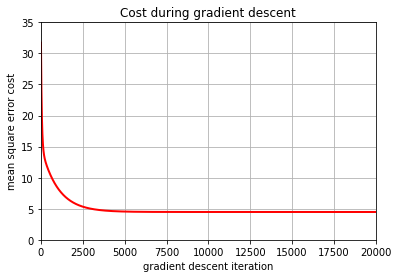

In [6]:
# plot the variation of the cost function with each iteration
plot_1d_scatterplot(range(0,max_iter), gradient_descent_cost_array[0:max_iter], "Cost during gradient descent", "gradient descent iteration", "mean square error cost",
                        [0, 20000, 0, 35], "r-", 2)

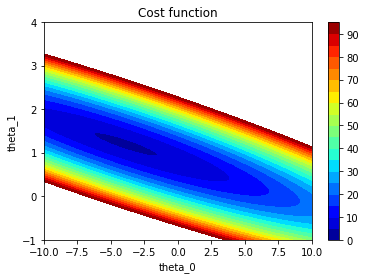

In [8]:
def plot_contour_plot(plot_array,x_vals,y_vals,title,xlabel,ylabel):
    pyplot.jet()
    cont = pyplot.contourf(x_vals, y_vals, plot_array, range(0,100,5))
    pyplot.colorbar(cont)
    pyplot.title(title)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.show()
    
# plot the contour plot of the cost function varying with the model parameters
theta_0_vals = np.arange(-10,10,0.01)
theta_1_vals = np.arange(-1,4,0.01)

# reallocate ip_design_array to correspond to feature normalized values
#ip_design_array = create_design_array(norm_x_array)

cost_function_array = np.zeros((theta_1_vals.size,theta_0_vals.size))

for i in range(theta_0_vals.size):
    for j in range(theta_1_vals.size):
        curr_parameter_array = np.array([[theta_0_vals[i]], [theta_1_vals[j]]])
        curr_cost = compute_cost_function_square_mean_error(ip_design_array, curr_parameter_array, ip_y_array)
        cost_function_array[j, i] = curr_cost[0,0]

plot_contour_plot(cost_function_array,theta_0_vals,theta_1_vals,"Cost function","theta_0","theta_1")